In [1]:
import pandas as pd
import numpy as np
robots=[[24,23680],[35,],[46,47350],[27,]]
data=pd.DataFrame(robots,columns=["max_speed","price"])
print(data)

   max_speed    price
0         24  23680.0
1         35      NaN
2         46  47350.0
3         27      NaN


In [2]:
data.dropna(subset=["price"],axis=0,inplace=True)
print(data)

   max_speed    price
0         24  23680.0
2         46  47350.0


In [3]:
data=pd.DataFrame(robots,columns=["max_speed","price"])
mean=data["price"].mean()
data.replace(np.NAN,mean,inplace=True)
print(data)

   max_speed    price
0         24  23680.0
1         35  35515.0
2         46  47350.0
3         27  35515.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/데이터마이닝/datas/iris_missing_values.csv")
df.index.name="record"
print(df.head())

        sepal length in cm  sepal width in cm  petal length in cm  \
record                                                              
0                      NaN                3.5                 1.4   
1                      4.9                3.0                 1.4   
2                      NaN                3.2                 1.3   
3                      4.6                3.1                 1.5   
4                      5.0                3.6                 1.4   

        petal width in cm species  
record                             
0                     0.2  setosa  
1                     0.2  setosa  
2                     0.2  setosa  
3                     0.2  setosa  
4                     0.2  setosa  


In [6]:
# get boolean True/False response for each datapoint for NaNs
df["sepal length in cm"].isnull()

record
0       True
1      False
2       True
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal length in cm, Length: 150, dtype: bool

In [7]:
#check if any missing values in column
df["sepal length in cm"].isnull().values.any()

True

In [8]:
# get number of many missing values in column
df["sepal length in cm"].isnull().values.sum()

6

In [9]:
# fill missing values with new values, store in new "df example" dataframe
df_example=df["sepal length in cm"].fillna("example")
print(df_example)

record
0      example
1          4.9
2      example
3          4.6
4          5.0
        ...   
145        6.7
146        6.3
147        6.5
148        6.2
149        5.9
Name: sepal length in cm, Length: 150, dtype: object


In [10]:
df_dropped=df.dropna(axis=0)
df_dropped.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,species
record,,,,,
1,4.9,3.0,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa


In [11]:
df_dropped=df.dropna(axis=1) #모든 열이 결측치인 행이 있어 출력결과 none이 됨
df_dropped.head()

""
record
0
1
2
3
4


In [12]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
cols=["sepal length in cm", "sepal width in cm", "petal length in cm","petal width in cm"]

In [13]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/데이터마이닝/datas/iris_missing_values.csv")
df.index.name="record"
print(df.head())

        sepal length in cm  sepal width in cm  petal length in cm  \
record                                                              
0                      NaN                3.5                 1.4   
1                      4.9                3.0                 1.4   
2                      NaN                3.2                 1.3   
3                      4.6                3.1                 1.5   
4                      5.0                3.6                 1.4   

        petal width in cm species  
record                             
0                     0.2  setosa  
1                     0.2  setosa  
2                     0.2  setosa  
3                     0.2  setosa  
4                     0.2  setosa  


In [14]:
out_imp=imputer.fit_transform(df[cols])
df_new=pd.DataFrame(data=out_imp,columns=cols)
df_new=pd.concat([df_new,df[["species"]]],axis=1)
print(df_new.head())

   sepal length in cm  sepal width in cm  petal length in cm  \
0            5.870139                3.5                 1.4   
1            4.900000                3.0                 1.4   
2            5.870139                3.2                 1.3   
3            4.600000                3.1                 1.5   
4            5.000000                3.6                 1.4   

   petal width in cm species  
0                0.2  setosa  
1                0.2  setosa  
2                0.2  setosa  
3                0.2  setosa  
4                0.2  setosa  


In [15]:
price=np.random.randint(100,size=8)*10000
cars=pd.DataFrame(price,columns=["price"])
cars

,price
0,480000
1,770000
2,320000
3,870000
4,90000
5,860000
6,350000
7,900000


In [16]:
group_names=["low","mid","high"]
cars["level"],mybin=pd.cut(cars["price"],3,labels=group_names,retbins=True)
cars

,price,level
0,480000,mid
1,770000,high
2,320000,low
3,870000,high
4,90000,low
5,860000,high
6,350000,low
7,900000,high


In [17]:
mybin

array([ 89190., 360000., 630000., 900000.])

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

#normalize the data and store in out_scaled numpy array
out_scaled=scaler.fit_transform(df[cols])
out_scaled

array([[       nan, 0.68181818, 0.06779661, 0.04166667],
       [0.16666667, 0.45454545, 0.06779661, 0.04166667],
       [       nan, 0.54545455, 0.05084746, 0.04166667],
       [0.08333333, 0.5       , 0.08474576, 0.04166667],
       [0.19444444, 0.72727273, 0.06779661, 0.04166667],
       [       nan, 0.86363636, 0.11864407, 0.125     ],
       [0.08333333, 0.63636364, 0.06779661, 0.08333333],
       [0.19444444, 0.63636364, 0.08474576, 0.04166667],
       [0.02777778, 0.40909091, 0.06779661, 0.04166667],
       [       nan,        nan,        nan,        nan],
       [0.30555556, 0.77272727, 0.08474576, 0.04166667],
       [0.13888889, 0.63636364, 0.10169492, 0.04166667],
       [0.13888889, 0.45454545, 0.06779661, 0.        ],
       [0.        , 0.45454545, 0.01694915, 0.        ],
       [0.41666667, 0.90909091, 0.03389831, 0.04166667],
       [       nan,        nan,        nan,        nan],
       [0.30555556, 0.86363636, 0.05084746, 0.125     ],
       [0.22222222, 0.68181818,

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#standardize the data and store in out_scaled numpy array
out_scaled=scaler.fit_transform(df[cols])
out_scaled[:10]

array([[        nan,  1.0873808 , -1.3749907 , -1.34813339],
       [-1.17061344, -0.10017475, -1.3749907 , -1.34813339],
       [        nan,  0.37484747, -1.4322009 , -1.34813339],
       [-1.53260701,  0.13733636, -1.3177805 , -1.34813339],
       [-1.04994892,  1.32489192, -1.3749907 , -1.34813339],
       [        nan,  2.03742525, -1.2033601 , -1.08336972],
       [-1.53260701,  0.84986969, -1.3749907 , -1.21575155],
       [-1.04994892,  0.84986969, -1.3177805 , -1.34813339],
       [-1.77393605, -0.33768587, -1.3749907 , -1.34813339],
       [        nan,         nan,         nan,         nan]])

In [20]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/데이터마이닝/datas/long_jump.csv")
df.set_index("Person",inplace=True)

In [21]:
# filter in categorical columns for demonstration
cats=["Jersey Size","Shoe Size"]
print(df[cats])

        Jersey Size  Shoe Size
Person                        
Thomas        small          7
Jane         medium         10
Vaughn        large         12
Vera         medium          9
Vincent       large         12
Lei-Ann       small          7


In [22]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

#fit and transform in one call and print categories
out_enc=enc.fit_transform(df[cats])
print("identified categories")
print(enc.categories_)
print("encoded data:")
print(out_enc)

identified categories
[array(['large', 'medium', 'small'], dtype=object), array([ 7,  9, 10, 12])]
encoded data:
[[2. 0.]
 [1. 2.]
 [0. 3.]
 [1. 1.]
 [0. 3.]
 [2. 0.]]


In [23]:
# overwrite categorical features in original dataframe
df[cats]=out_enc
print(df.head())

         Age  Height  Weight  Training Hours/week Jersey Color  Jersey Size  \
Person                                                                        
Thomas    12    57.5    73.4                  6.5         blue          2.0   
Jane      13    65.5    85.3                  8.9        green          1.0   
Vaughn    17    71.9   125.9                  1.1        green          0.0   
Vera      14    65.3   100.5                  7.9          red          1.0   
Vincent   18    70.1   110.7                 10.5         blue          0.0   

         Shoe Size  Long Jump  
Person                         
Thomas         0.0       19.2  
Jane           2.0       25.1  
Vaughn         3.0       14.3  
Vera           1.0       18.3  
Vincent        3.0       21.1  


In [24]:
# import module and instantiate enc object
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)

In [25]:
# fit and transform in one call and print categories
out_enc=enc.fit_transform(df[cats])
new_cols=enc.get_feature_names_out(cats).tolist()
print(new_cols)

['Jersey Size_0.0', 'Jersey Size_1.0', 'Jersey Size_2.0', 'Shoe Size_0.0', 'Shoe Size_1.0', 'Shoe Size_2.0', 'Shoe Size_3.0']


In [26]:
# create temporary dataframe "df_enc" for concatenation with original data
df_enc=pd.DataFrame(data=out_enc,columns=new_cols)
df_enc.index=df.index

#drop original columns and concat new encoded columns
df.drop(cats,axis=1,inplace=True)
df=pd.concat([df,df_enc],axis=1)
print(df.columns)

Index(['Age', 'Height', 'Weight', 'Training Hours/week', 'Jersey Color',
       'Long Jump', 'Jersey Size_0.0', 'Jersey Size_1.0', 'Jersey Size_2.0',
       'Shoe Size_0.0', 'Shoe Size_1.0', 'Shoe Size_2.0', 'Shoe Size_3.0'],
      dtype='object')


In [27]:
# import modules and instantiate enc object
from sklearn import preprocessing
enc=preprocessing.LabelEncoder()

# fit with integer labels and transform
out_enc=enc.fit_transform([1,2,5,2,4,2,5])
print(out_enc)

# fit with string labels and transform
out_enc=enc.fit_transform(["blue","red","blue","green","red","red"])
print(out_enc)

[0 1 3 1 2 1 3]
[0 2 0 1 2 2]


In [28]:
# ex.
genders=["female","male"]
locations=["from Africa","from Asia","from Europe","from US"]
browsers=["uses Chrome","uses Firefox","uses IE","uses Safari"]
enc=preprocessing.OrdinalEncoder(categories=[genders,locations,browsers])

X=[["male","from US","uses Safari"],["female","from Europe","uses Firefox"]]
enc.fit(X)

OrdinalEncoder(categories=[['female', 'male'],
                           ['from Africa', 'from Asia', 'from Europe',
                            'from US'],
                           ['uses Chrome', 'uses Firefox', 'uses IE',
                            'uses Safari']])

In [29]:
enc.transform([["female","from US","uses IE"]])

array([[0., 3., 2.]])

In [30]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/데이터마이닝/datas/iris.csv");
df.index.name='record'
df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,species
record,,,,,
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica


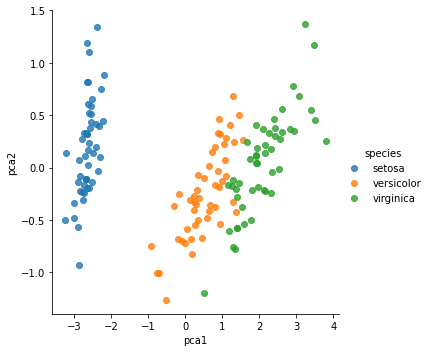

In [32]:
# pca 방법
import seaborn as sns
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
out_pca=pca.fit_transform(df[["sepal length in cm", "sepal width in cm", "petal length in cm","petal width in cm"]]) # 4 cols input dimensions
df_pca=pd.DataFrame(data=out_pca, columns=["pca1","pca2"])
df_pca=pd.concat([df_pca,df[["species"]]],axis=1)
sns.lmplot(x="pca1",y="pca2",hue="species",data=df_pca,fit_reg=False)

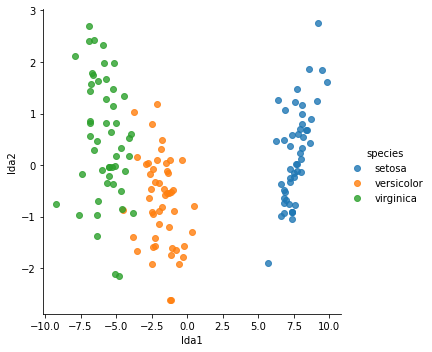

In [33]:
# lda 방법
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)
cols=["sepal length in cm", "sepal width in cm", "petal length in cm","petal width in cm"]
lda.fit(df[cols],df["species"])
out_lda=lda.transform(df[cols])

df_lda=pd.DataFrame(data=out_lda,columns=["lda1","lda2"])
df_lda=pd.concat([df_lda,df[["species"]]],axis=1)
sns.lmplot(x="lda1",y="lda2",hue="species",data=df_lda,fit_reg=False)